# Advanced Backend API Testing and Comprehensive Data Analysis

This Jupyter Notebook extensively tests and analyzes the REST API built with NestJS and its integration with multiple databases:

- **PostgreSQL** (relational data: users, groups)
- **Cassandra** (messages, notifications)
- **Redis** (cache performance)
- **Neo4j** (user relationships)
- **Storage Bucket** (file uploads)

### Objectives:
- Verify database connectivity and API responses.
- Generate and validate fake data.
- Perform detailed performance analysis.
- Confirm integration across all databases.

In [1]:
# Install required libraries
%pip install requests pandas matplotlib seaborn faker psycopg2-binary neo4j redis boto3
%pip install cassandra-driver --no-binary cassandra-driver


  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached charset_normalizer-3.4.1-cp312-cp312-macosx_10_13_universal2.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
  Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 6.0 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.1 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached pandas-2.2.3-cp312-cp312-ma

In [2]:
# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import time
import psycopg2
from cassandra.cluster import Cluster
from neo4j import GraphDatabase
import redis
import boto3

fake = Faker()

## Backend setup (Terminal)

```bash
npm run start:dev
```

In [3]:
# API Base URL
API_BASE = "http://localhost:3000"

## Database Settings

In [4]:
# Database configurations
POSTGRES_SETTINGS = {'host':'localhost', 'port':5432, 'user':'postgres','password':'postgres','database':'mydb'}
CASSANDRA_SETTINGS = {'host':['127.0.0.1'],'port':9042}
NEO4J_SETTINGS = {'uri':'bolt://localhost:7687','user':'neo4j','password':'neo4j'}
REDIS_SETTINGS = {'host':'localhost','port':6379,'db':0}
STORAGE_SETTINGS = {'endpoint':'http://localhost:9000','access_key':'minioadmin','secret_key':'minioadmin','bucket':'uploads'}

# Verifying database connections

In [5]:
# PostgreSQL Check
conn_pg=psycopg2.connect(**POSTGRES_SETTINGS)
cur_pg=conn_pg.cursor()
cur_pg.execute('SELECT COUNT(*) FROM "user";')
print('PostgreSQL Users:', cur_pg.fetchone()[0])
cur_pg.close()
conn_pg.close()

# Cassandra Check
cluster_cass=Cluster(CASSANDRA_SETTINGS['host'],port=CASSANDRA_SETTINGS['port'])
session_cass=cluster_cass.connect('summer_trip')
rows=session_cass.execute('SELECT COUNT(*) FROM messages;')
print('Cassandra Messages:',rows.one()[0])

# Redis Check
redis_client=redis.Redis(**REDIS_SETTINGS)
redis_client.set('test','Redis OK')
print('Redis Check:',redis_client.get('test'))

# Neo4j Check
driver_neo4j=GraphDatabase.driver(**NEO4J_SETTINGS)
with driver_neo4j.session() as session:
    result=session.run('MATCH (n) RETURN COUNT(n) AS count')
    print('Neo4j Nodes:',result.single()['count'])

driver_neo4j.close()

# Storage Check
s3_client=boto3.client('s3',endpoint_url=STORAGE_SETTINGS['endpoint'],aws_access_key_id=STORAGE_SETTINGS['access_key'],aws_secret_access_key=STORAGE_SETTINGS['secret_key'])
s3_client.put_object(Bucket=STORAGE_SETTINGS['bucket'],Key='test.txt',Body=b'Test file')
response=s3_client.get_object(Bucket=STORAGE_SETTINGS['bucket'],Key='test.txt')
print('Storage Bucket Content:',response['Body'].read().decode())

UndefinedTable: relation "user" does not exist
LINE 1: SELECT COUNT(*) FROM "user";
                             ^


## Performance Testing (PostgreSQL example)

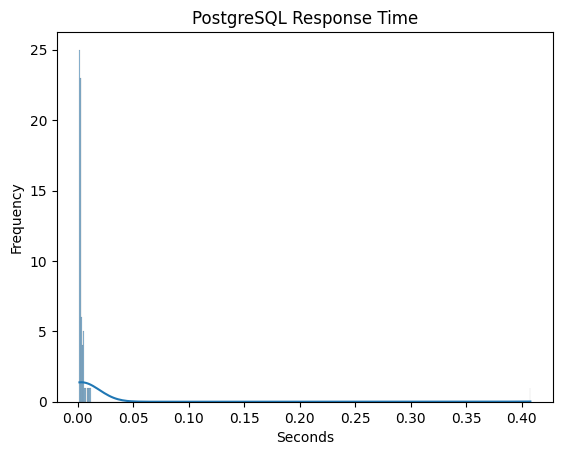

In [6]:
# PostgreSQL GET performance
times=[]
for _ in range(100):
    start=time.time()
    requests.get(f'{API_BASE}/users')
    times.append(time.time()-start)

sns.histplot(times,kde=True)
plt.title('PostgreSQL Response Time')
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.show()

## Performance Testing (Cassandra example)

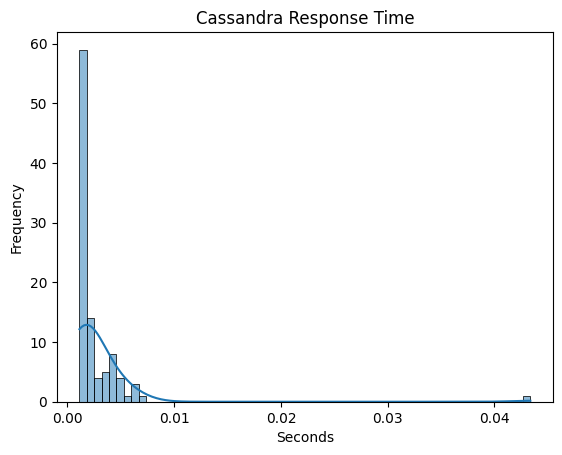

In [7]:
# Cassandra GET performance
times=[]
for _ in range(100):
    start=time.time()
    requests.get(f'{API_BASE}/messages')
    times.append(time.time()-start)

sns.histplot(times,kde=True)
plt.title('Cassandra Response Time')
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.show()

## Performance Testing (Redis example)

In [ ]:
# Redis GET performance
times=[]
for _ in range(100):
    start=time.time()
    requests.get(f'{API_BASE}/cache')
    times.append(time.time()-start)

sns.histplot(times,kde=True)
plt.title('Redis Response Time')
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.show()

## Performance Testing (Neo4j example)

In [ ]:
# Neo4j GET performance
times=[]
for _ in range(100):
    start=time.time()
    requests.get(f'{API_BASE}/relationships')
    times.append(time.time()-start)

sns.histplot(times,kde=True)
plt.title('Neo4j Response Time')
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.show()

## Performance Testing (Storage example)

In [ ]:
# Storage GET performance
times=[]
for _ in range(100):
    start=time.time()
    requests.get(f'{API_BASE}/files/test.txt')
    times.append(time.time()-start)

sns.histplot(times,kde=True)
plt.title('Storage Response Time')
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.show()

## Fake Data Generation (Cassandra example)

In [8]:
# Add fake messages
for _ in range(50):
    requests.post(f'{API_BASE}/messages',json={
        'sender_id':fake.uuid4(),
        'receiver_id':fake.uuid4(),
        'content':fake.text()
    })
print('Added 50 messages.')

Added 50 messages.


## Fake Data Generation (Redis example)

In [ ]:
# Add fake cache entries
for _ in range(50):
    requests.post(f'{API_BASE}/cache',json={
        'key':fake.uuid4(),
        'value':fake.text()
    })
print('Added 50 cache entries.')

## Fake Data Generation (Neo4j example)

In [ ]:
# Add fake relationships
for _ in range(50):
    requests.post(f'{API_BASE}/relationships',json={
        'user1_id':fake.uuid4(),
        'user2_id':fake.uuid4(),
        'type':fake.random_element(elements=('friend', 'colleague', 'family'))
    })
print('Added 50 relationships.')

## Fake Data Generation (Storage example)

In [ ]:
# Add fake files
for _ in range(50):
    requests.post(f'{API_BASE}/files',files={'file':('test.txt',fake.text())})
print('Added 50 files.')

# Close all database connections after testing

In [ ]:
session_cass.shutdown()
cluster_cass.shutdown()
redis_client.close()